# STATISTIQUE AVEC PYTHON

# 1ere Partie: Statistique descriptive avec Python à l'aide de l'outil jupyter d'Anaconda

Nous allons utiliser un tableau des donnees de 10 étudiants, on a observé les valeurs des variables : Couleur des Yeux, Sexe, Mention au Bac et Note à l’Examen de Statistique.

# Creation du tableau a l'aide numpy et pandas

In [2]:
import pandas as pd
import numpy as np

data = {'noms':pd.Series(['Michel','Jean','Stéphane','Charles','Agnès','Nadine','Étienne','Gilles','Aurélie','Stéphanie']), 
        'yeux':pd.Series(['V','B','N','M','B','V','N','M','B','V']), 
        'sexe':pd.Series(['M','M','M','M','F','F''M','M','F','F']),
        'mention':pd.Series(['P','AB','P','AB','P','B','B','AB','P','B']),
        'note':pd.Series([12,8,13,11,10,9,16,14,11,15])}
df = pd.DataFrame(data)

# Affichage du Tableau

In [31]:
print (df)

        noms yeux sexe mention  note
0     Michel    V    M       P    12
1       Jean    B    M      AB     8
2   Stéphane    N    M       P    13
3    Charles    M    M      AB    11
4      Agnès    B    F       P    10
5     Nadine    V   FM       B     9
6    Étienne    N    M       B    16
7     Gilles    M    F      AB    14
8    Aurélie    B    F       P    11
9  Stéphanie    V  NaN       B    15


# STATISTIQUE Descriptive

# Calcul de la Moyenne

In [3]:
df['note'].mean()

11.9

# Calcul de l'ecart type

In [4]:
df['note'].std()

2.601281735350223

# Calcul de la variance

In [34]:
df['note'].var()

6.7666666666666675

# Calcul de la mediane

In [35]:
df['note'].median()

11.5

 # Calcul du minimum

In [36]:
df['note'].min()

8

 # Calcul du maximum

In [5]:
df['note'].max()

16

# Calcul de la somme

In [6]:
df['note'].sum()

119

# A present nous allons realiser les quelques diagramme pour cela nous avons besoins de la librairie graphique "MATPLOTLIB" et "PyLab"

Nous allons utiliser le tableau des effectifs des mentions des 10 etudiants du tableau precedent

In [7]:
data = {'Mention':pd.Series(['Passable', 'A Bien', 'Bien']),
        'Effectifs':pd.Series([8, 4, 2])}
df = pd.DataFrame(data)
print (df)

    Mention  Effectifs
0  Passable          8
1    A Bien          4
2      Bien          2


# Importation des libraries et creation de la variable pour la figure

In [9]:
import matplotlib.pyplot as plt
import pylab

fig = plt.figure()

# Creation de l'histogramme

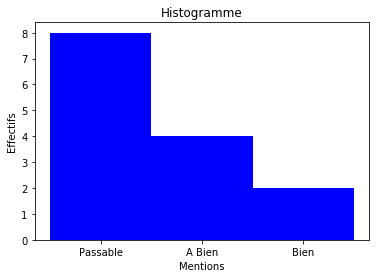

In [10]:
mention = ['Passable', 'A Bien', 'Bien']
effectif = [8, 4, 2]
width = 1.0

plt.bar(mention, effectif, width, color='b')
plt.title('Histogramme')
plt.ylabel('Effectifs')
plt.xlabel('Mentions')
plt.savefig('Histogramme.png')
plt.show()

# Creation du diagramme a bande

La difference entre un la generation du diagramme à bande et histogramme c'est la largeur qui change qui pour notre cas present est nommée "width"

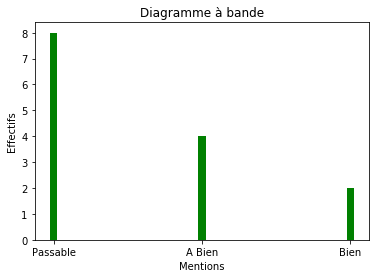

In [11]:
mention = ['Passable', 'A Bien', 'Bien']
effectif = [8, 4, 2]
width = 0.05

plt.bar(mention, effectif, width, color='g')
plt.title('Diagramme à bande')
plt.ylabel('Effectifs')
plt.xlabel('Mentions')
plt.savefig('Diagramme à bande.png')
plt.show()

# Création du diagramme circulaire

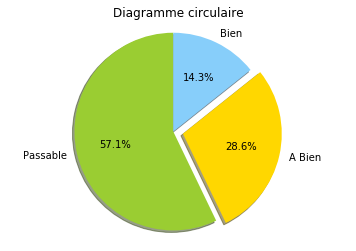

In [12]:
mention = 'Passable', 'A Bien', 'Bien'
effectif = [8, 4, 2]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0.1, 0,)

plt.pie(effectif, explode=explode, labels=mention, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Diagramme circulaire')

plt.savefig('circulaire.png')
plt.show()

# 2e Partie: Utilisations des lois pour faire des tests statistiques

Pour faire des tests statistique nous allons faire utiliser la librairie "scipy" qui contient le package stats

# Importation de la librairie scipy.stats

In [13]:
import scipy.stats as stat

L’objectif ici est d’obtenir les valeurs des quantiles et des fonctions de répartition pour différentes lois statistiques utilisées pour l’inférence.

# La loi normale centrée et réduite

Le quantile d’ordre 0.95 de la loi normale suivant la méthode ppf (Percent Point Function)

In [15]:
print(stat.norm.ppf(0.95,loc=0,scale=1))

1.6448536269514722


Le quantile d’ordre 1.96 de la loi normale suivant la méthode cdf (Cumulative Distribution Function)

In [16]:
print(stat.norm.cdf(1.96,loc=0,scale=1))

0.9750021048517795


# La loi de Student - ddl = 30

la méthode du ppf

In [17]:
print(stat.t.ppf(0.95,df=30)) 

1.6972608943617378


la méthode du cdf

In [18]:
print(stat.t.cdf(1.96,df=30))

0.9703288435519748


# La loi du khi-2 - ddl = 10

la méthode du ppf

In [19]:
print(stat.chi.ppf(0.95,df=10))

4.278672463892877


la méthode du cdf

In [20]:
print(stat.chi.cdf(4.84,df=10)) 

0.9907199233490717


# La loi de Fisher, ddl numérateur = 1, ddl dénominateur = 30

la méthode du ppf

In [22]:
print(stat.f.ppf(0.95,dfn=1,dfd=30))

4.170876785766691


la méthode du cdf

In [23]:
print(stat.f.cdf(3.48,dfn=1,dfd=30))

0.9280786614651921


# Exemple d'un test ANOVA a un facteur

In [82]:
dbeef = np.array([495,477,425,322,482,587,370,322,479,375,330,300,386,401,645,440,317,319,298,253])
dmeat = np.array([458,506,473,545,496,360,387,386,507,393,405,372,144,511,405,428,339])
dpoultry = np.array([430,375,396,383,387,542,359,357,528,513,426,513,358,581,588,522,545])

print(stat.f_oneway(dbeef,dmeat,dpoultry)) 

F_onewayResult(statistic=1.7777910697271164, pvalue=0.17932466808492342)


Fin du tutorial Cordialement DAOUDA HASSANA DAOUDA